# Figure Five: Elemental Composition

- Left: Abundances (elemental and charge state ratios)
- Right Panels: Correlations between abundances

## Imports

In [11]:
import sys, os
import astropy.units as u

import datetime
import numpy as np
import pandas as pd
import scipy.constants as con
from scipy import stats
import scipy.stats as stats
from scipy.interpolate import interp1d
from pandas.tseries.frequencies import to_offset

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


import sunpy
import astrospice
from astropy.time import Time
from pyspedas import time_string

import tools.utilities as utils
import tools.psp_funcs as psp_funcs
import tools.pfss_funcs as pfss_funcs


for sc in ['psp','solar orbiter'] : kernels = astrospice.registry.get_kernels(sc,'predict') 

# COLORS
c = ['#ae017e','#085A99',  '#c98000'] # darker colors
lightc = ['#FCA4C4',  '#8FD3F4', '#FFCC70'] # lighter colors
fcol = 'mistyrose'
sacol='lavender'
scol = 'violet'
hcol = 'lightblue'
pcol = 'lightgreen'
aa = 0.6
lw=2
clon = c[0]
clat = c[1]
rcol = 'dimgrey'
cmaps = ['RdPu', 'cool', 'Wistia', 'spring'] # velocity, density, magnetic field

# REGIONS
loc_hcs = [112, 115]
pseud = [166.5, 173]
fsw = [70, 85]
ssw = [150, 166.5]
sasw = [173, 185]

# DIRECTORIES
IMG_DIR = './figures'
DF_DIR = './results'
PlotDir = '/Users/tamarervin/mplstyle/'


# PLOT STYLING
plot_style = os.path.join(PlotDir, 'figure_series.mplstyle')
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.cal'] = 'Helvetica Neue LT Pro'
plt.rcParams.update({'font.size': 16})
plt.style.use(plot_style)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

02-Aug-23 14:55:53: /Users/tamarervin/miniconda3/envs/e11_conjunction/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),



Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

In [2]:
# regular data
parker = pd.read_csv('/Users/tamarervin/e11_conjunction/results/parker.csv')
orbiter = pd.read_csv('/Users/tamarervin/e11_conjunction/results/orbiter.csv')
abun = pd.read_csv('/Users/tamarervin/e11_conjunction/results/abun.csv')
smag = pd.read_csv('/Users/tamarervin/e11_conjunction/results/solo_mag.csv')
merged_df = pd.read_csv('/Users/tamarervin/e11_conjunction/results/merged_df.csv')
pss = pd.read_csv('/Users/tamarervin/e11_conjunction/results/pss.csv')

# timesampled data
parkerdownt = pd.read_csv('/Users/tamarervin/e11_conjunction/results/parkerdownt.csv')
orbiterdownt = pd.read_csv('/Users/tamarervin/e11_conjunction/results/orbiterdownt.csv')
abundownt = pd.read_csv('/Users/tamarervin/e11_conjunction/results/abundownt.csv')
smagdownt = pd.read_csv('/Users/tamarervin/e11_conjunction/results/smagdownt.csv')

# longitudinally sampled data
parkerdownl = pd.read_csv('/Users/tamarervin/e11_conjunction/results/parkerdownl.csv')
orbiterdownl = pd.read_csv('/Users/tamarervin/e11_conjunction/results/orbiterdownl.csv')
abundownl = pd.read_csv('/Users/tamarervin/e11_conjunction/results/abundownl.csv')
smagdownl = pd.read_csv('/Users/tamarervin/e11_conjunction/results/smagdownl.csv')

# PFSS/MHD data
tracerdf = pd.read_csv('/Users/tamarervin/e11_conjunction/mhd/mhd_footpoints.dat', sep='\s+') 
so_tracerdf = pd.read_csv('/Users/tamarervin/e11_conjunction/mhd/so_mhd_footpoints.dat', sep='\s+')
pfss = pd.read_csv('/Users/tamarervin/e11_conjunction/results/psp_pfss.csv')
so_pfss = pd.read_csv('/Users/tamarervin/e11_conjunction/results/so_pfss.csv')

# FIX TIMESTAMPS
parker['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in parker.Time]
orbiter['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S.%f') for d in orbiter.Time]
pss['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in pss.Time]
smag['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S.%f') for d in smag.Time]
abun['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S.%f') for d in abun.Time]
so_pfss['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in so_pfss.times]
parkerdownt['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in parkerdownt.Time]
orbiterdownt['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in orbiterdownt.Time]
smagdownt['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in smagdownt.Time]
abundownt['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in abundownt.Time]


## Abundance Figure

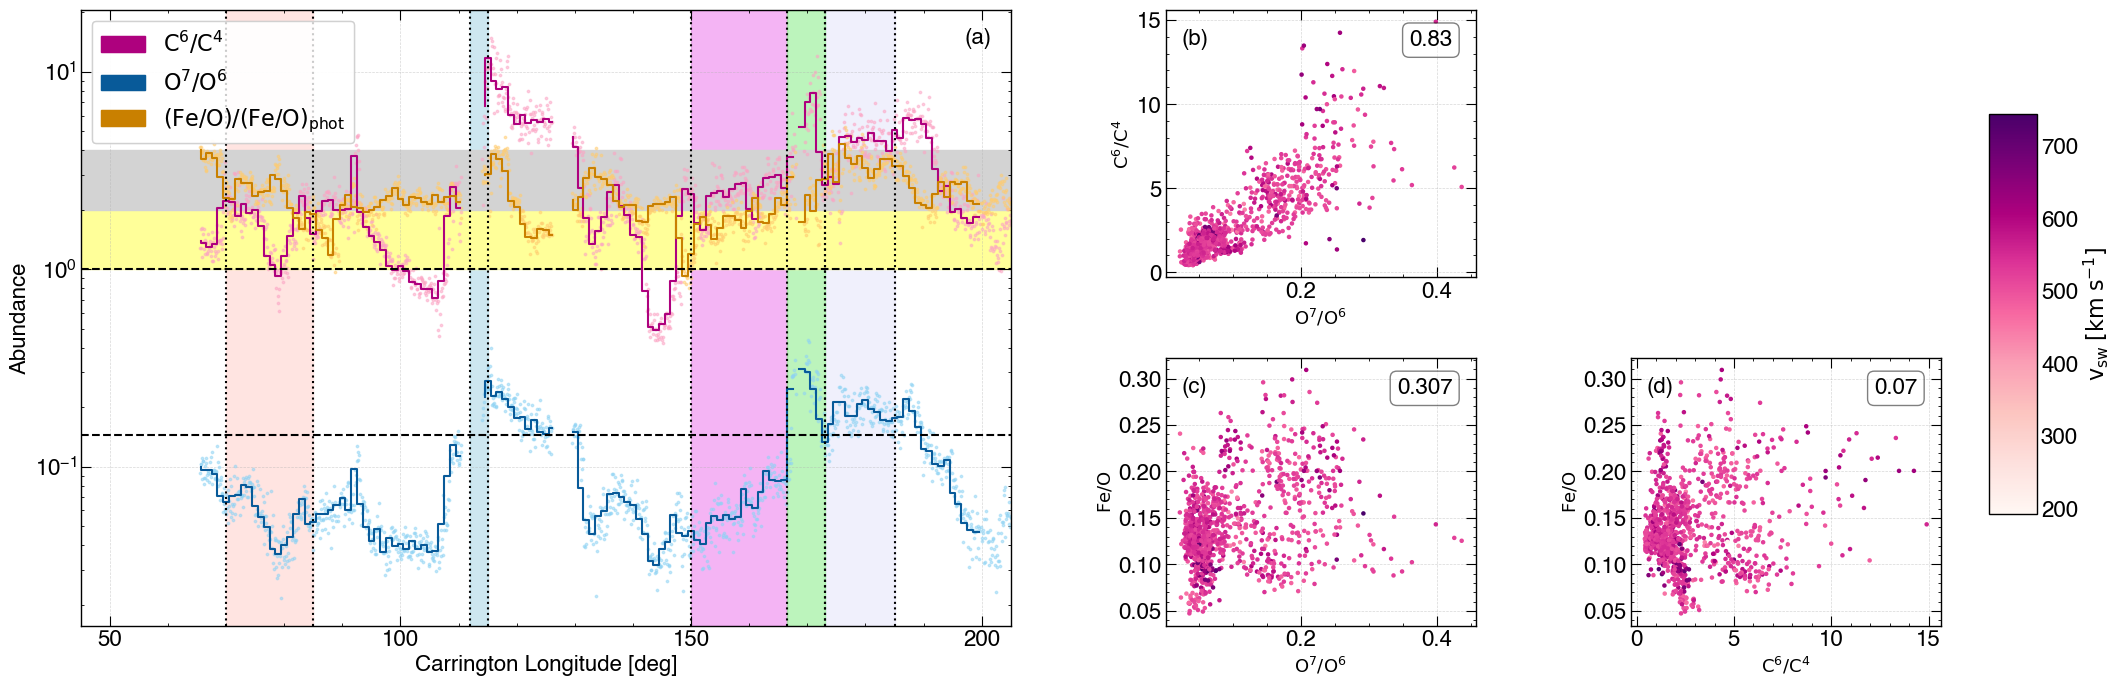

In [7]:
# look at elemental composition as function of wind speed
fig = plt.figure(figsize=(24, 8))
grid = plt.GridSpec(2, 3, width_ratios=[3, 1, 1], hspace=0.3, wspace=.3)
plt.rcParams.update({'font.size': 16})

# left side plot
ax1 = fig.add_subplot(grid[:, 0])
# regular data
ax1.scatter(abun.lon, abun.car, color=lightc[0], s=3, alpha=0.5)
ax1.scatter(abun.lon, abun.oxy, color=lightc[1], s=3, alpha=0.5)
ax1.scatter(abun.lon, abun.iron/0.0589, color=lightc[2], s=3, alpha=0.5)
ax1.step(abundownl.lon, abundownl.car, color=c[0])
ax1.step(abundownl.lon, abundownl.oxy, color=c[1])
ax1.step(abundownl.lon, abundownl.iron/0.0589, color=c[2])
ax1.text(0.95, 0.97, '(a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')
ax1.set_yscale('log')

# ratio of 1
ax1.axhline(y=1, ls='dashed', color='k')
ax1.axhline(y=0.145, ls='dashed', color='k')
ax1.axhspan(1, 2, alpha=1, color='#FFFF99', zorder=-2)
ax1.axhspan(2, 4, alpha=1, color='#D3D3D3', zorder=-2)

# plot legend
C_patch = mpatches.Patch(color=c[0], label= r'$\rm C^6/C^4$')
O_patch = mpatches.Patch(color=c[1],  label=r'$\rm O^7/O^6$')
Fe_patch = mpatches.Patch(color=c[2],  label=r'$\rm (Fe/O)/(Fe/O)_{phot}$')
# n_patch = mpatches.Patch(color=c[3],  label=r'$\rm n_a/n_p$')
leg0 = ax1.legend(handles=[C_patch, O_patch, Fe_patch], loc='upper left', fontsize=16)
ax1.add_artist(leg0)
ax1.set(xlim=(45, 205), xticks=np.arange(50, 205, step=50))
ax1.set_xticklabels(np.arange(50, 205, step=50), fontsize=16)
ax1.set_xlabel('Carrington Longitude [deg]', fontsize=16)
ax1.set_ylabel('Abundance', fontsize=16)

# shade interesting regions
ax1.axvspan(fsw[0], fsw[1], alpha=1, color=fcol, zorder=-3)
ax1.axvspan(ssw[0], ssw[1], alpha=aa, color=scol, zorder=-3)
ax1.axvspan(sasw[0], sasw[1], alpha=aa, color=sacol, zorder=-3)
ax1.axvspan(loc_hcs[0], loc_hcs[1], alpha=aa, color=hcol, zorder=-3)
ax1.axvspan(pseud[0], pseud[1], alpha=aa, color=pcol, zorder=-3)
ax1.axvline(loc_hcs[0], color='k', linestyle='dotted', zorder=5)
ax1.axvline(loc_hcs[1], color='k', linestyle='dotted', zorder=5)
ax1.axvline(pseud[0], color='k', linestyle='dotted', zorder=5)
ax1.axvline(pseud[1], color='k', linestyle='dotted', zorder=5)
ax1.axvline(fsw[0], color='k', linestyle='dotted', zorder=5)
ax1.axvline(fsw[1], color='k', linestyle='dotted', zorder=5)
ax1.axvline(ssw[0], color='k', linestyle='dotted', zorder=5)
ax1.axvline(sasw[0], color='k', linestyle='dotted', zorder=5)
ax1.axvline(sasw[1], color='k', linestyle='dotted', zorder=5)
ax1.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

# right hand plot
# for all days
df = pd.read_csv(os.path.join(DF_DIR, 'mldf.csv'))
data_list = [df.oxy, df.car, df.feo]
labels = [r'$\rm O^7/O^6$', r'$\rm C^6/C^4$', r'$\rm Fe/O$']

data = np.zeros((len(data_list[0]), len(data_list)))
for i, d in enumerate(data_list):
    data[:, i] = d

# create plots
ax2 = fig.add_subplot(grid[0, 1])
ax3 = fig.add_subplot(grid[1, 1])
ax4 = fig.add_subplot(grid[1, 2])
ax2.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
ax3.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
ax4.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
ax2.scatter(df.oxy, df.car, cmap='RdPu', c=df.vsw, s=5)
ax3.scatter(df.oxy, df.feo, cmap='RdPu', c=df.vsw, s=5)
im = ax4.scatter(df.car, df.feo, cmap='RdPu', c=df.vsw, s=5)

# add axes labels
labels = [r'$\rm O^7/O^6$', r'$\rm C^6/C^4$', r'$\rm Fe/O$']
ax2.set(xlabel=labels[0], ylabel=labels[1])
ax3.set(xlabel=labels[0], ylabel=labels[2])
ax4.set(xlabel=labels[1], ylabel=labels[2])
ax2.text(0.05, 0.93, '(b)', transform=ax2.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')
ax3.text(0.05, 0.93, '(c)', transform=ax3.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')
ax4.text(0.05, 0.93, '(d)', transform=ax4.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')

# add correlation
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
corr = stats.spearmanr(df.oxy, df.car)
ax2.text(0.925, 0.925, str(np.round(corr[0], 3)), transform=ax2.transAxes, color='k', 
alpha=1.0, ha='right', va='top', fontweight='bold', bbox=props,  fontsize=16)
corr = stats.spearmanr(df.oxy, df.feo)
ax3.text(0.925, 0.925, str(np.round(corr[0], 3)), transform=ax3.transAxes, color='k', 
alpha=1.0, ha='right', va='top', fontweight='bold', bbox=props,  fontsize=16)
corr = stats.spearmanr(df.car, df.feo)
ax4.text(0.925, 0.925, str(np.round(corr[0], 3)), transform=ax4.transAxes, color='k', 
alpha=1.0, ha='right', va='top', fontweight='bold', bbox=props,  fontsize=16)

# fig.subplots_adjust(left=0.8)
cax = fig.add_axes([0.92, 0.25, 0.02, 0.5]) 
cbar = fig.colorbar(im, cax=cax)
cbar.set_label(r'$\rm v_{sw} \; [km \; s^{-1}]$', fontsize=16)
# fig.subplots_adjust(right=0.85)

# plt.tight_layout()
fig.savefig('figures/abundance.png', bbox_inches='tight')

## Density and Velocity Figure

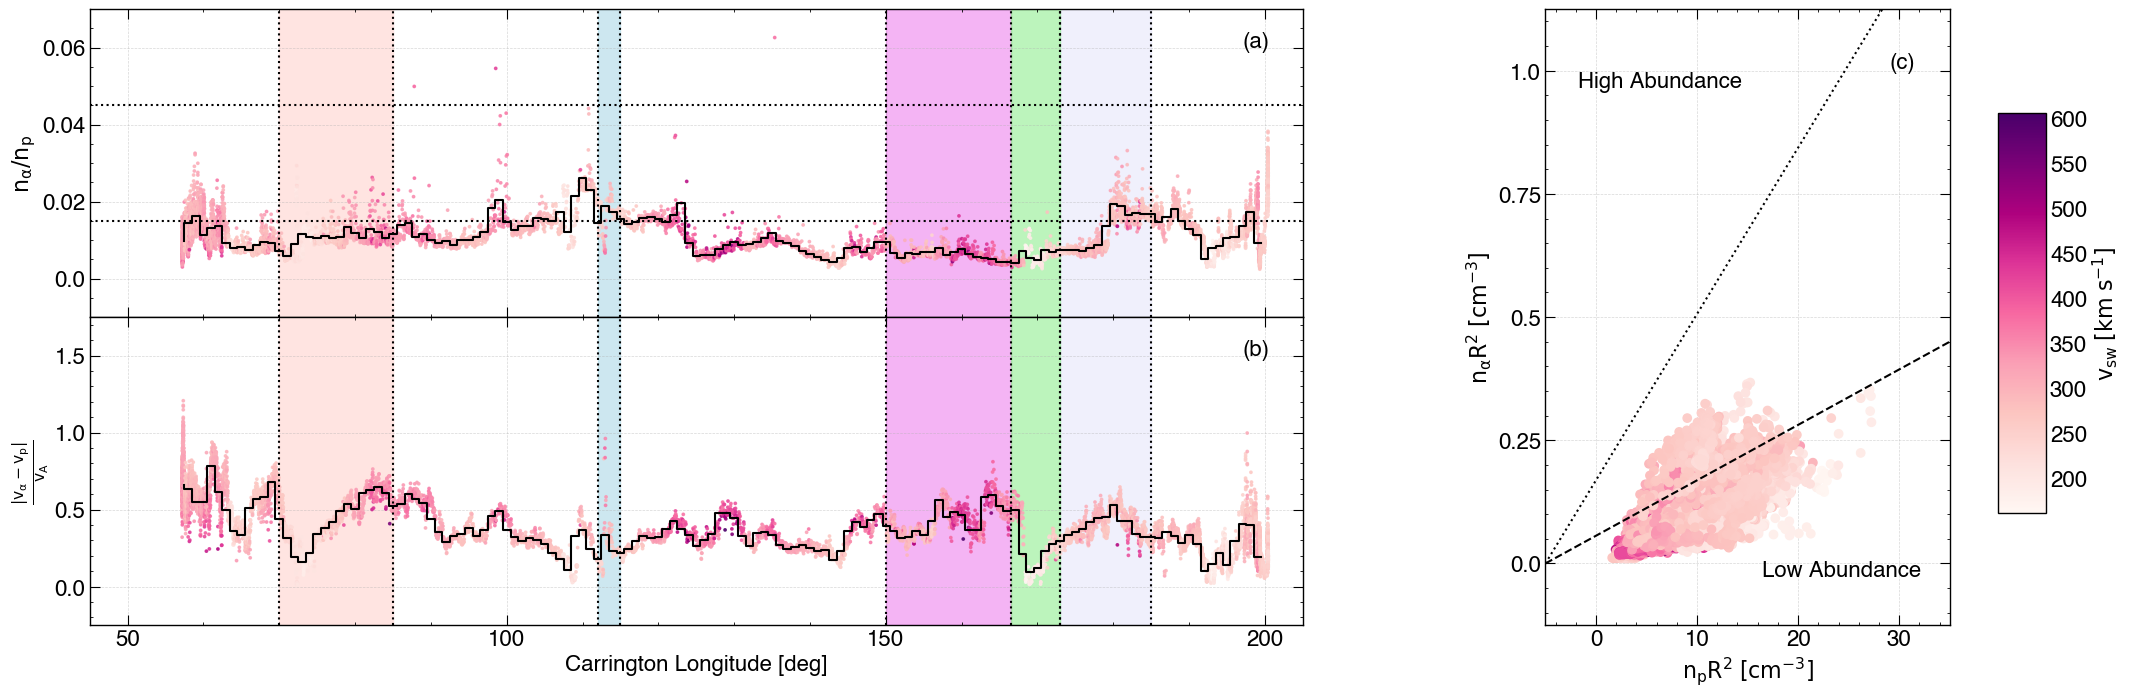

In [9]:
# Create figure and axes
fig = plt.figure(figsize=(24, 8))

# Define grid for subplots
grid = plt.GridSpec(2, 2, width_ratios=[3, 1], height_ratios=[1, 1])
ylabel_list = [r'$\rm n_{\alpha} / n_p$', r'$\rm \frac{|v_{\alpha} - v_p|}{v_A}$']
panel_labels = ['(a)', '(b)', '(c)']

# Create the first subplot (top)
ax = plt.subplot(grid[0, 0])
cmap='RdPu'
hcs = 112
sc = ax.scatter(parker.lon, parker.Ahe, c=parker.pvel, cmap=cmap, s=3, alpha=0.8) 
ax.step(parkerdownl.lon, np.abs(parkerdownl.Ahe), c='k')
ax.set(ylim=(-0.05, 0.25), yticks=np.arange(0, 0.21, step=0.05))
ax.set_ylabel(ylabel_list[0], fontsize=16)
ax.set(xlim=(45, 205), xticks=np.arange(50, 205, step=50))
ax.set(ylim=(-0.01, 0.07), yticks=np.arange(0, 0.061, step=0.02))
ax.set_xticklabels(np.arange(50, 205, step=50), fontsize=16)
ax.set_yticklabels(np.arange(0, 0.061, step=0.02), fontsize=16)
ax.axhline(0.015, color='k', linestyle='dotted')
ax.axhline(0.045, color='k', linestyle='dotted')
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

# Create the second subplot (bottom)
ax = plt.subplot(grid[1, 0])
sc = ax.scatter(parker.lon, parker.vap/parker.vA, c=parker.pvel, cmap=cmap, s=3, alpha=0.8)
ax.step(parkerdownl.lon, parkerdownl.vap/parkerdownl.vA, c='k')
ax.set_ylabel(ylabel_list[1], fontsize=16)
ax.set(xlim=(45, 205), xticks=np.arange(50, 205, step=50))
ax.set(ylim=(-.25, 1.75), yticks=np.arange(0, 1.51, step=0.5))
ax.set_xticklabels(np.arange(50, 205, step=50), fontsize=16)
ax.set_yticklabels(np.arange(0, 1.51, step=0.5), fontsize=16)
ax.set_xlabel('Carrington Longitude [deg]', fontsize=16)

# Shade regions
for i, ax in enumerate([plt.subplot(grid[0, 0]), plt.subplot(grid[1, 0])]):
    # shade interesting regions
    ax.axvspan(fsw[0], fsw[1], alpha=1, color=fcol, zorder=-3)
    ax.axvspan(ssw[0], ssw[1], alpha=aa, color=scol, zorder=-3)
    ax.axvspan(sasw[0], sasw[1], alpha=aa, color=sacol, zorder=-3)
    ax.axvspan(loc_hcs[0], loc_hcs[1], alpha=aa, color=hcol, zorder=-3)
    ax.axvspan(pseud[0], pseud[1], alpha=aa, color=pcol, zorder=-3)
    ax.axvline(loc_hcs[0], color='k', linestyle='dotted', zorder=5)
    ax.axvline(loc_hcs[1], color='k', linestyle='dotted', zorder=5)
    ax.axvline(pseud[0], color='k', linestyle='dotted', zorder=5)
    ax.axvline(pseud[1], color='k', linestyle='dotted', zorder=5)
    ax.axvline(fsw[0], color='k', linestyle='dotted', zorder=5)
    ax.axvline(fsw[1], color='k', linestyle='dotted', zorder=5)
    ax.axvline(ssw[0], color='k', linestyle='dotted', zorder=5)
    ax.axvline(sasw[0], color='k', linestyle='dotted', zorder=5)
    ax.axvline(sasw[1], color='k', linestyle='dotted', zorder=5)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
    ax.text(0.95, 0.93, panel_labels[i], transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')


# Create the square subplot on the right
ax = plt.subplot(grid[:, 1])
ssc = ax.scatter(parker.pdens, parker.adens, c=parker.pvel, cmap=cmap) #, edgecolor='k', linewidth=0.8)
ax.set_xlabel(r'$\rm n_p R^2 \; [cm^{-3}]$', fontsize=16)
ax.set_ylabel(r'$\rm n_{\alpha} R^2 \; [cm^{-3}]$', fontsize=16)
ax.set(xlim=(-5, 35), xticks=np.arange(0, 31, step=10))
ax.set(ylim=(-0.125, 1.125), yticks=np.arange(0, 1.1, step=0.25))
ax.set_xticklabels(np.arange(0, 31, step=10), fontsize=16)
ax.set_yticklabels(np.arange(0, 1.1, step=0.25), fontsize=16)
ax.plot(np.linspace(-5, 35), np.linspace(0, 30)*0.015, color='k', linestyle='dashed')
ax.plot(np.linspace(-5, 35), np.linspace(0, 30)*0.045, color='k', linestyle='dotted')
ax.text(0.08, 0.9, 'High Abundance', transform=ax.transAxes, fontsize=16, va='top')
ax.text(0.93, 0.08, 'Low Abundance', transform=ax.transAxes, fontsize=16, ha='right')
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
ax.text(0.85, 0.93, panel_labels[2], transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')

# fig.subplots_adjust(right=0.8)
cax = fig.add_axes([0.92, 0.25, 0.02, 0.5]) 
cbar = fig.colorbar(ssc, cax=cax)
cbar.set_label(r'$\rm v_{sw} \; [km \; s^{-1}]$', fontsize=16)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0) 
# plt.tight_layout()

plt.savefig('figures/dens_vel.png', bbox_inches='tight')


## Testing abundance figure

In [12]:
lon_footpoints = df.lon
fast = np.logical_and(lon_footpoints >= fsw[0], lon_footpoints <=fsw[1])
slow = np.logical_and(lon_footpoints >= ssw[0], lon_footpoints <=ssw[1])
salf = np.logical_and(lon_footpoints >= sasw[0], lon_footpoints <=sasw[1])
hcss = np.logical_and(lon_footpoints >= loc_hcs[0], lon_footpoints <=loc_hcs[1])
pseudo = np.logical_and(lon_footpoints >=pseud[0], lon_footpoints <=pseud[1])

In [ ]:
# look at elemental composition as function of wind speed
fig = plt.figure(figsize=(24, 8))
grid = plt.GridSpec(2, 3, width_ratios=[3, 1, 1], hspace=0.3, wspace=.3)
plt.rcParams.update({'font.size': 16})

# left side plot
ax1 = fig.add_subplot(grid[:, 0])
# regular data
ax1.scatter(abun.lon, abun.car, color=lightc[0], s=3, alpha=0.5)
ax1.scatter(abun.lon, abun.oxy, color=lightc[1], s=3, alpha=0.5)
ax1.scatter(abun.lon, abun.iron/0.0589, color=lightc[2], s=3, alpha=0.5)
ax1.step(abundownl.lon, abundownl.car, color=c[0])
ax1.step(abundownl.lon, abundownl.oxy, color=c[1])
ax1.step(abundownl.lon, abundownl.iron/0.0589, color=c[2])
ax1.text(0.95, 0.97, '(a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')
ax1.set_yscale('log')

# ratio of 1
ax1.axhline(y=1, ls='dashed', color='k')
ax1.axhline(y=0.145, ls='dashed', color='k')
ax1.axhspan(1, 2, alpha=1, color='#FFFF99', zorder=-2)
ax1.axhspan(2, 4, alpha=1, color='#D3D3D3', zorder=-2)

# plot legend
C_patch = mpatches.Patch(color=c[0], label= r'$\rm C^6/C^4$')
O_patch = mpatches.Patch(color=c[1],  label=r'$\rm O^7/O^6$')
Fe_patch = mpatches.Patch(color=c[2],  label=r'$\rm (Fe/O)/(Fe/O)_{phot}$')
leg0 = ax1.legend(handles=[C_patch, O_patch, Fe_patch], loc='upper left', fontsize=16)
ax1.add_artist(leg0)
ax1.set(xlim=(45, 205), xticks=np.arange(50, 205, step=50))
ax1.set_xticklabels(np.arange(50, 205, step=50), fontsize=16)
ax1.set_xlabel('Carrington Longitude [deg]', fontsize=16)
ax1.set_ylabel('Abundance', fontsize=16)

# shade interesting regions
ax1.axvspan(fsw[0], fsw[1], alpha=1, color=fcol, zorder=-3)
ax1.axvspan(ssw[0], ssw[1], alpha=aa, color=scol, zorder=-3)
ax1.axvspan(sasw[0], sasw[1], alpha=aa, color=sacol, zorder=-3)
ax1.axvspan(loc_hcs[0], loc_hcs[1], alpha=aa, color=hcol, zorder=-3)
ax1.axvspan(pseud[0], pseud[1], alpha=aa, color=pcol, zorder=-3)
ax1.axvline(loc_hcs[0], color='k', linestyle='dotted', zorder=5)
ax1.axvline(loc_hcs[1], color='k', linestyle='dotted', zorder=5)
ax1.axvline(pseud[0], color='k', linestyle='dotted', zorder=5)
ax1.axvline(pseud[1], color='k', linestyle='dotted', zorder=5)
ax1.axvline(fsw[0], color='k', linestyle='dotted', zorder=5)
ax1.axvline(fsw[1], color='k', linestyle='dotted', zorder=5)
ax1.axvline(ssw[0], color='k', linestyle='dotted', zorder=5)
ax1.axvline(sasw[0], color='k', linestyle='dotted', zorder=5)
ax1.axvline(sasw[1], color='k', linestyle='dotted', zorder=5)
ax1.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

# right hand plot
# for all days
df = pd.read_csv(os.path.join(DF_DIR, 'mldf.csv'))
data_list = [df.oxy, df.car, df.feo]
labels = [r'$\rm O^7/O^6$', r'$\rm C^6/C^4$', r'$\rm Fe/O$']

data = np.zeros((len(data_list[0]), len(data_list)))
for i, d in enumerate(data_list):
    data[:, i] = d

# create plots
ax2 = fig.add_subplot(grid[0, 1])
ax3 = fig.add_subplot(grid[1, 1])
ax4 = fig.add_subplot(grid[1, 2])
ax2.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
ax3.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
ax4.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

ax2.scatter(df.oxy[fsw], df.car[fsw], c=fcol, s=5)
ax2.scatter(df.oxy, df.car, cmap='RdPu', c=df.vsw, s=5)
ax2.scatter(df.oxy, df.car, cmap='RdPu', c=df.vsw, s=5)
ax3.scatter(df.oxy, df.feo, cmap='RdPu', c=df.vsw, s=5)
ax4.scatter(df.car, df.feo, cmap='RdPu', c=df.vsw, s=5)

# add axes labels
labels = [r'$\rm O^7/O^6$', r'$\rm C^6/C^4$', r'$\rm Fe/O$']
ax2.set(xlabel=labels[0], ylabel=labels[1])
ax3.set(xlabel=labels[0], ylabel=labels[2])
ax4.set(xlabel=labels[1], ylabel=labels[2])
ax2.text(0.05, 0.93, '(b)', transform=ax2.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')
ax3.text(0.05, 0.93, '(c)', transform=ax3.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')
ax4.text(0.05, 0.93, '(d)', transform=ax4.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')

# add correlation
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
corr = stats.spearmanr(df.oxy, df.car)
ax2.text(0.925, 0.925, str(np.round(corr[0], 3)), transform=ax2.transAxes, color='k', 
alpha=1.0, ha='right', va='top', fontweight='bold', bbox=props,  fontsize=16)
corr = stats.spearmanr(df.oxy, df.feo)
ax3.text(0.925, 0.925, str(np.round(corr[0], 3)), transform=ax3.transAxes, color='k', 
alpha=1.0, ha='right', va='top', fontweight='bold', bbox=props,  fontsize=16)
corr = stats.spearmanr(df.car, df.feo)
ax4.text(0.925, 0.925, str(np.round(corr[0], 3)), transform=ax4.transAxes, color='k', 
alpha=1.0, ha='right', va='top', fontweight='bold', bbox=props,  fontsize=16)

# fig.subplots_adjust(left=0.8)
# cax = fig.add_axes([0.92, 0.25, 0.02, 0.5]) 
# cbar = fig.colorbar(im, cax=cax)
# cbar.set_label(r'$\rm v_{sw} \; [km \; s^{-1}]$', fontsize=16)
# fig.subplots_adjust(right=0.85)

# plt.tight_layout()
fig.savefig('figures/abundance.png', bbox_inches='tight')

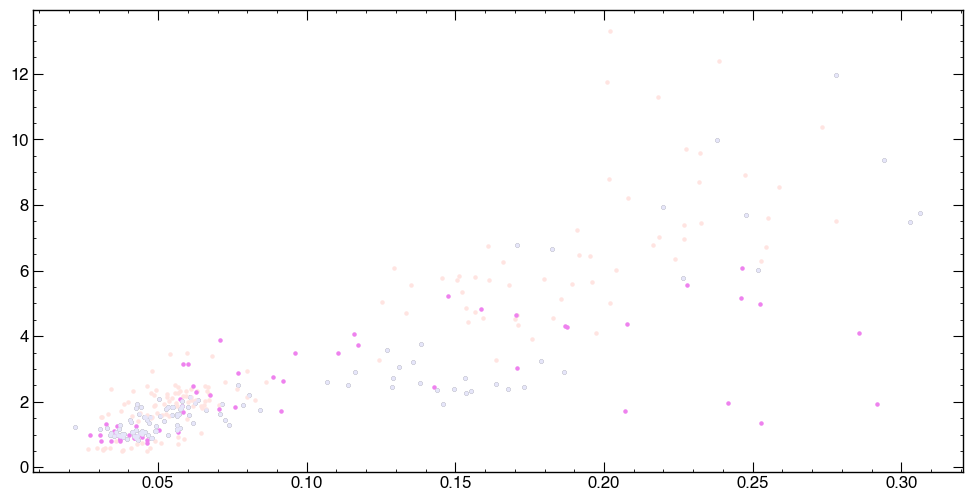

In [16]:
fig, ax2 = plt.subplots(1, 1, figsize=[12, 6])
ax2.scatter(df.oxy[salf], df.car[salf], c='grey', s=5)
ax2.scatter(df.oxy[fast], df.car[fast], c=fcol, s=5)
ax2.scatter(df.oxy[slow], df.car[slow], c=scol, s=5)
ax2.scatter(df.oxy[salf], df.car[salf], c=sacol, s=5)